In [6]:
pip install matplotlib

     ---------------------------------------- 7.5/7.5 MB 10.9 MB/s eta 0:00:00
     ---------------------------------------- 56.1/56.1 kB ? eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 17.8 MB/s eta 0:00:00
     ---------------------------------------- 98.3/98.3 kB 5.5 MB/s eta 0:00:00
     ------------------------------------- 470.4/470.4 kB 14.8 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 12.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, MaxPool2D 
import matplotlib.pyplot as plt

In [10]:
x_train.shape

(10000, 28, 28)

In [9]:
# Load the MNIST dataset (B&W labeled pictures of digits)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# The dataframe contains 70,000 images, we only keep a subsets
x_train = x_train[:10000]
y_train = y_train[:10000]
x_test = x_test[:2000]
y_test = y_test[:2000]

# We define the architecture of the network (2 convolutional layers)
model = Sequential([
          Input(shape=(28,28,1)),
          Conv2D(filters=6, kernel_size=(5,5), padding="same", activation="relu"),
          MaxPool2D(pool_size=(2,2)),
          Conv2D(filters=16, kernel_size=(5,5), padding="same", activation="relu"),
          Flatten(),
          Dense(units=84, activation="relu"),
          Dense(units=10, activation="softmax"),
      ])

# Define the training process of the network. Since this a categorization tasks, we use cross entrophy as a loss functio
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["acc"])

# Train the model
history = model.fit(x=x_train, y=y_train, batch_size=2**9, epochs=10, validation_data=(x_test, y_test))

11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/10
20/20 [==============================] - 14s 457ms/step - loss: 4.7118 - acc: 0.5771 - val_loss: 0.8907 - val_acc: 0.7495
Epoch 2/10
20/20 [==============================] - 8s 399ms/step - loss: 0.4825 - acc: 0.8532 - val_loss: 0.5108 - val_acc: 0.8520
Epoch 3/10
20/20 [==============================] - 7s 350ms/step - loss: 0.2758 - acc: 0.9166 - val_loss: 0.3828 - val_acc: 0.8895
Epoch 4/10
20/20 [==============================] - 8s 425ms/step - loss: 0.1804 - acc: 0.9502 - val_loss: 0.3252 - val_acc: 0.9090
Epoch 5/10
20/20 [==============================] - 7s 356ms/step - loss: 0.1229 - acc: 0.9666 - val_loss: 0.2950 - val_acc: 0.9165
Epoch 6/10
20/20 [==============================] - 7s 332ms/step - loss: 0.0821 - acc: 0.9775 - val_loss: 0.2748 - val_acc: 0.9250
Epoch 7/10
20/20 [==============================] - 7s 328ms/step - loss: 0.0548 - acc: 0.9874 - val_loss: 0.2622 - val_acc: 0.9285
Epoch 8/10

In [11]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


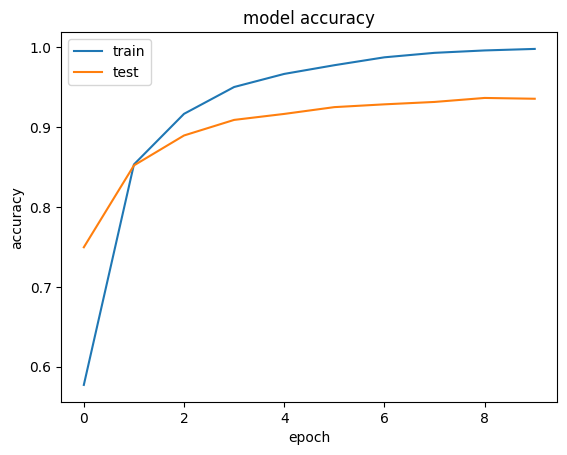

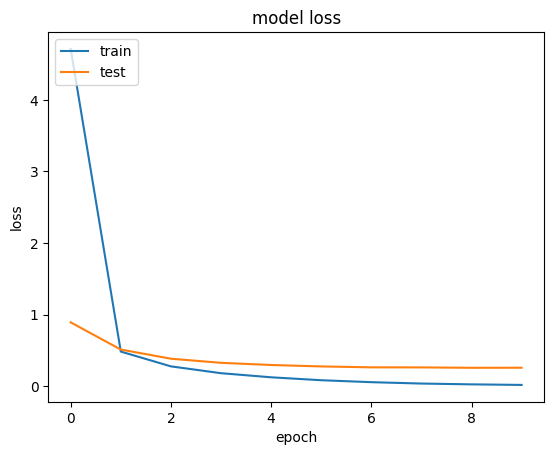

In [12]:
# Plot model accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plot loss function
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

